# Detecting Building defects using  VGG16

### Importing necessary libraries

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


### Image Data Agumentation¶

In [2]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#performing data agumentation on train data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#performing data agumentation on test data
test_datagen = ImageDataGenerator(rescale = 1./255)

### Loading our data and performing data agumentation

In [3]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'E:\Guided Projects Github\Detecting-building-defects-using-VGG16-main\data\train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 316 images belonging to 3 classes.


In [4]:
test_set = test_datagen.flow_from_directory(r'E:\Guided Projects Github\Detecting-building-defects-using-VGG16-main\data\test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 3 classes.


In [5]:
print(training_set.class_indices)#checking the number of classes

{'crack': 0, 'flakes': 1, 'roof': 2}


In [6]:
from collections import Counter as c
c(training_set .labels)

Counter({0: 86, 1: 176, 2: 54})

## Model Building

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'E:\Guided Projects Github\Detecting-building-defects-using-VGG16-main\data\train_set'
valid_path = r'E:\Guided Projects Github\Detecting-building-defects-using-VGG16-main\data\test_set'


In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 82s 1us/step


In [9]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob(r'E:\Guided Projects Github\Detecting-building-defects-using-VGG16-main\data\train_set\*')

In [11]:
folders

['E:\\Guided Projects Github\\Detecting-building-defects-using-VGG16-main\\data\\train_set\\crack',
 'E:\\Guided Projects Github\\Detecting-building-defects-using-VGG16-main\\data\\train_set\\flakes',
 'E:\\Guided Projects Github\\Detecting-building-defects-using-VGG16-main\\data\\train_set\\roof']

In [12]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [14]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Compiling the model

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


### Fit the model

In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\shubh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 184s 16s/step - loss: 1.3828 - accuracy: 0.5348 - val_loss: 0.9960 - val_accuracy: 0.6250
Epoch 2/10
10/10 [==============================] - 156s 16s/step - loss: 0.5697 - accuracy: 0.7500 - val_loss: 0.8343 - val_accuracy: 0.6917
Epoch 3/10
10/10 [==============================] - 146s 15s/step - loss: 0.3821 - accuracy: 0.8354 - val_loss: 0.4972 - val_accuracy: 0.7833
Epoch 4/10
10/10 [==============================] - 134s 14s/step - loss: 0.3269 - accuracy: 0.8766 - val_loss: 0.6938 - val_accuracy: 0.7750
Epoch 5/10
10/10 [==============================] - 135s 14s/step - loss: 0.3016 - accuracy: 0.8797 - val_loss: 0.5323 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 141s 15s/step - loss: 0.2194 - accuracy: 0.9241 - val_loss: 0.6051 - val_accuracy: 0.7917
Epoch 7/10
10/10 [==============================] - 138s 14s/step - loss: 0.2133 - accuracy: 0.9335 - val_loss: 0.9330 - val_accuracy: 0.7250
Epoch 

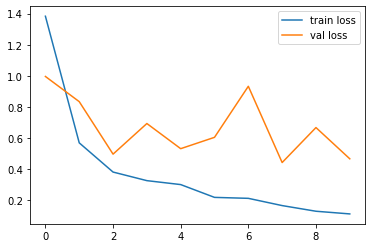

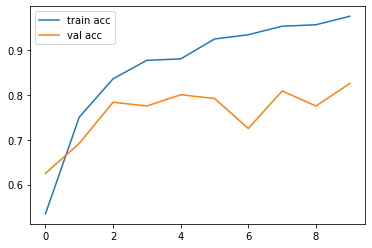

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Saving our model

In [19]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_building_defects_vgg16.h5')

### Predicitng our results

In [20]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
model = load_model("model_building_defects_vgg16.h5") #loading the model for testing

In [21]:
img=image.load_img(r'E:\Guided Projects Github\Detecting-building-defects-using-VGG16-main\data\train_set\crack\38.jpg',target_size=(224,224))
x=image.img_to_array(img)
#x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)


In [22]:
a

array([0], dtype=int64)

In [23]:
index=['crack','flakes','roof']
result=str(index[a[0]])
result

'crack'